In [130]:
import json
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
#from model import makeModel
import helper
import nlpaug.augmenter.word as naw
import torch
import matplotlib.pyplot as plt

In [128]:
import tensorflow as tf

def makeModel(vocab_size, embedding_dim, max_length):
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        
        #tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                                                                # 0.001,
                                                                # decay_steps=100000,
                                                                # decay_rate=0.98,
                                                                # staircase=True)

    model.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(7e-5), metrics=["accuracy"])
    # learning_rate=1.1220e-04
    return model

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [124]:
with open("./data/training_data.json", 'r') as f:
    datastore = json.load(f)

headlines = []
labels = []

for item in datastore:
    headlines.append(item['title'])
    labels.append(item['good_news'])

# split the data 80/20
training_headlines, testing_headlines, training_labels, testing_labels = train_test_split(headlines, labels, train_size=0.8, test_size=0.2)
#print(training_labels)

#limiting character length and vocab size
vocab_size = 10000
max_length = 25
embedding_dim = 10
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# training tokenizer
tokenizer.fit_on_texts(headlines)
word_index = tokenizer.word_index



TOPK=20 #default=100
ACT = 'insert' #"substitute"
training_headlines_aug=[] 

# with open(r'data/augmented_training_data.txt', 'w', encoding="utf-8") as fp:

#     for i in range(len(training_headlines)):
#         aug = naw.ContextualWordEmbsAug(
#             model_path='bert-base-uncased', action="insert")
#         fp.write(str(aug.augment(training_headlines[i])) + "\n")
#         print(str(i) + " out of " + str(len(training_headlines)))

# print("------------------------------------------------------------------------------")
# print("Augmented Text:")
# print(training_headlines_aug[0:10])

with open('data/augmented_training_data.txt', 'r', encoding='UTF-8') as file:
    for line in file:
        training_headlines_aug.append(line)
    
file.close()
#print(training_headlines_aug[0])

# adding padding 
training_sequences = tokenizer.texts_to_sequences(training_headlines)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_headlines)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



In [133]:
tf.keras.backend.clear_session()
model = makeModel(vocab_size, 16, max_length)
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(training_padded, training_labels, batch_size=4, epochs=100, validation_data=(testing_padded, testing_labels), callbacks=[])

Epoch 1/100
94/94 [==============================] - 3s 20ms/step - loss: 0.7093 - accuracy: 0.4840 - val_loss: 0.6879 - val_accuracy: 0.5851
Epoch 2/100
94/94 [==============================] - 1s 14ms/step - loss: 0.6869 - accuracy: 0.5559 - val_loss: 0.6849 - val_accuracy: 0.5957
Epoch 3/100
94/94 [==============================] - 1s 14ms/step - loss: 0.6778 - accuracy: 0.5931 - val_loss: 0.6817 - val_accuracy: 0.5957
Epoch 4/100
94/94 [==============================] - 1s 15ms/step - loss: 0.6742 - accuracy: 0.5824 - val_loss: 0.6786 - val_accuracy: 0.5957
Epoch 5/100
94/94 [==============================] - 1s 14ms/step - loss: 0.6592 - accuracy: 0.6090 - val_loss: 0.6758 - val_accuracy: 0.5851
Epoch 6/100
94/94 [==============================] - 1s 14ms/step - loss: 0.6721 - accuracy: 0.5878 - val_loss: 0.6743 - val_accuracy: 0.5851
Epoch 7/100
94/94 [==============================] - 1s 14ms/step - loss: 0.6607 - accuracy: 0.6037 - val_loss: 0.6732 - val_accuracy: 0.5851
Epoch 

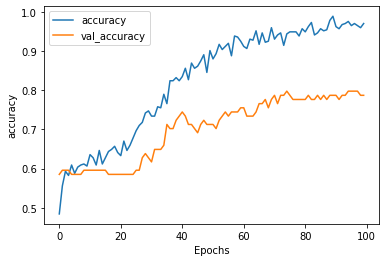

In [134]:
plot_graphs(history, "accuracy")


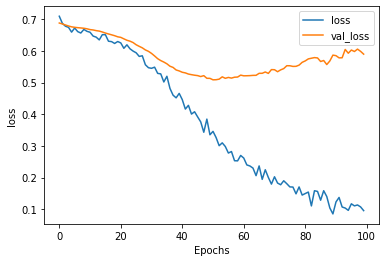

In [135]:
plot_graphs(history, "loss")